# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Rina Adhista
- **Email:** rinadhista04@gmail.com
- **ID Dicoding:** rina_adhista_xWeR

## Menentukan Pertanyaan Bisnis

- Penyewaan terjadi mayoritas di season apa?
- Pada hari ke berapa di weekdays penyewaan terjadi?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt


## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


karena pada kolom dteday bertipe objek maka diubah menjadi tipe data date tima

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Karena pada kedua data tidak ada missing value maka tidak perlu perilaku khusus untuk mengatasi missing value pada kedua data di atas


### Cleaning Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Tidak dilakukan cleaning data karena tidak terdpat missing values, duplicate data dan innacurate data. hnya pengubahan tipe data menjadi tanggal pada kolom date time

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
describe_day = day_df.describe()
describe_day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada describe di atas nampak bahwa minimal windspeed pada data berdasarkan hari adalah 0.022392 dan maksimal yaitu 0.507463 dengan rata-rata 0.190486. Rata rata penyewaan terjadi pada bulan ke 6 pada tahun 2011

In [ ]:
weekday_sum = day_df.groupby(['weekday']).agg({'cnt':'sum'}).reset_index()
weekday_sum

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


Melalui hasil di atas maka dari itu banyak terjadi penyewaan pada saat weekday pada hari ke 5 atau bisa diasumsikan hari jumat dengan total yaitu 487790 dan paling sedikit pada hari ke 0 atau bisa diasumsikan hari minggu dengan total 444027

In [ ]:
day_sum = day_df.groupby(['season']).agg({'cnt':'sum'}).reset_index()
day_sum

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


Pada eksplor data tersebu tertera bahwa penyewaan sepeda banyak terjadi pada season 3 yatu pada season fall dan penyewaan paling sedikit terjadi pada season 1 yaitu springer

## Visualization & Explanatory Analysis

### Pertanyaan 1:

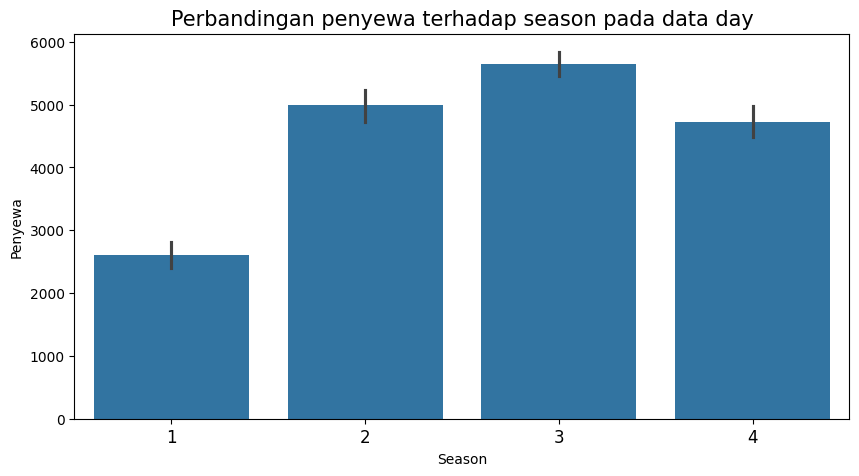

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="season",
    data=day_df.sort_values(by="cnt", ascending=False),
)
plt.title("Perbandingan penyewa terhadap season pada data day", loc="center", fontsize=15)
plt.ylabel("Penyewa")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

In [ ]:
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

day_df['weekday'] = day_df['weekday'].map(day_mapping)

# Display the resulting DataFrame
print(day_df)

     instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0          1 2011-01-01       1   0     1        0   Saturday           0   
1          2 2011-01-02       1   0     1        0     Sunday           0   
2          3 2011-01-03       1   0     1        0     Monday           1   
3          4 2011-01-04       1   0     1        0    Tuesday           1   
4          5 2011-01-05       1   0     1        0  Wednesday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
726      727 2012-12-27       1   1    12        0   Thursday           1   
727      728 2012-12-28       1   1    12        0     Friday           1   
728      729 2012-12-29       1   1    12        0   Saturday           0   
729      730 2012-12-30       1   1    12        0     Sunday           0   
730      731 2012-12-31       1   1    12        0     Monday           1   

     weathersit      temp     atemp       hum  windspeed  casual  registere

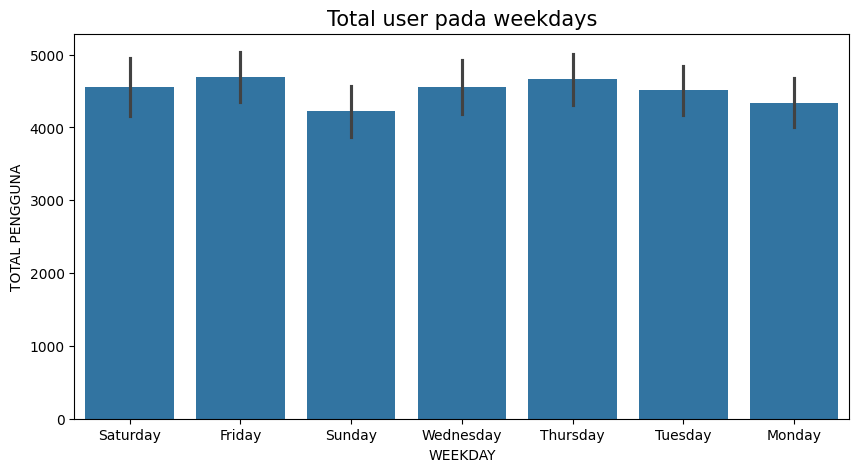

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="weekday",
    data=day_df.sort_values(by="cnt", ascending=False),
)
plt.title("Total user pada weekdays", loc="center", fontsize=15)
plt.ylabel("TOTAL PENGGUNA")
plt.xlabel("WEEKDAY")
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Pada eksplor data tersebut tertera bahwa penyewaan sepeda banyak terjadi pada season 3 yatu pada season fall dan penyewaan paling sedikit terjadi pada season 1 yaitu springer
- Conclution pertanyaan 2 : Melalui hasil di atas maka dari itu banyak terjadi penyewaan pada saat weekday pada hari ke 5 atau bisa diasumsikan hari jumat dengan total yaitu 487790 dan paling sedikit pada hari ke 0 atau bisa diasumsikan hari minggu dengan total 444027


In [ ]:
day_df.to_csv('day_data.csv', index=False)